# Hysteresis Test

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

import leaf_spring

In [2]:
num_steps = 10000

start_time = 0.0
end_time = 600.0
dt = (end_time - start_time) / (num_steps - 1)

velocity = 0.0
displacement = 0.0

v = 10.0

samples = np.zeros((num_steps, 3))

for i in range(num_steps):
    velocity += random.uniform(-v * dt, v * dt)
    displacement += velocity * dt
    if displacement < 0:
        velocity = 0
        displacement = 0
    elif displacement >= 140.0:
        velocity = 0
        displacement = 140.0
    
    force = leaf_spring.sample_force(displacement, velocity)

    samples[i, 0] = displacement
    samples[i, 1] = velocity
    samples[i, 2] = force
    
samples

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.46109939e-03, 7.43442214e-02, 1.28086447e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.14749368e+00, 1.02569793e+00, 6.16585309e-01],
       [2.20686359e+00, 9.89399558e-01, 6.33631513e-01],
       [2.26200720e+00, 9.18968259e-01, 6.49464267e-01]])

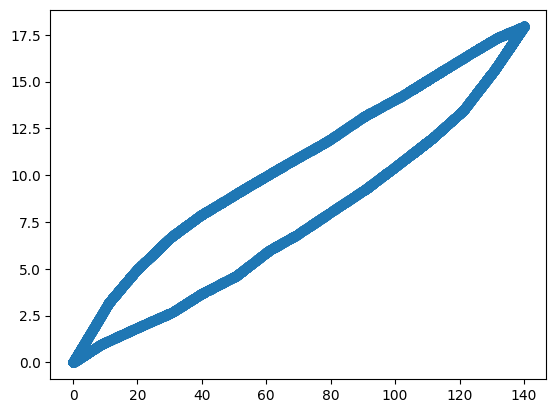

In [3]:
x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])

plt.scatter(samples[:, 0], samples[:, 2])
plt.show()

In [4]:
df = pd.DataFrame(samples, columns=["displacement", "velocity", "force"])
df.to_csv("samples.csv", index=False)